# CHAPTER 7 합성곱 신경망(CNN)

합성곱 신경망 (Convolutional neural network) <br>
CNN은 이미지 인식과 음성 인식 등 다양한 곳에서 사용된다. <br>
특히 이미지 인식 분야에서는 cnn을 기초로 한다.

<h3> 7.1 전체 구조 </h3>


지금까지 본 신경망은 완전연결(fully-connected)로 인접하는 계층의 모든 뉴런과 결합되어 있었다.<br>
하지만 CNN은 합성곱계층(Conv)와 풀링계층(Pooling)이 추가된다.(풀링계층은 생략하기도 한다.) <br>
주목할 점은 출력에 가까운 층에서는 지금까지 했던 신경망처럼 완전연결 - 활성화함수 구성을 사용할 수 있다. <br>
또한 마지막 층은 완전연결 - 활성화함수(softmax) 조합을 그대로 사용한다. <br>
> 이것이 일반적으로 CNN에서 흔히 볼 수 있는 구성

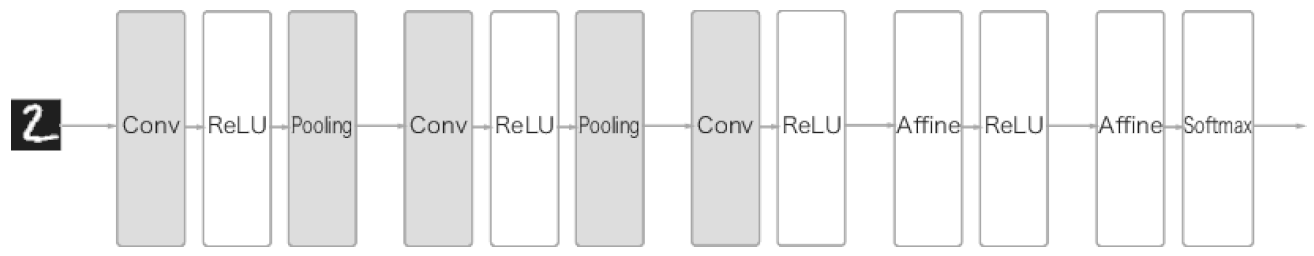

<h3> 7.2 합성곱 계층 </h3>
CNN에서는 패딩, 스트라이드 등 고유의 용어가 등장한다. <br>
각 계층사이는 3차원 데이터같이 입체적인 데이터가 흐른다는 점에서 완전연결 신경망과 다르다

7.2.1 완전연결 계층의 문제점 <br>
완전연결 계층은 '데이터의 형상이 무시'된다는 문제점이 있다.<br>
>ex_<br>
> 이미지 같은 경우 세로,가로,채널(색상)으로 구성된 3차원 데이터이다. <br>
> 하지만 완전 연결 계층은 1차원으로 데이터를 평탄화해줘야 한다. <br>
> 3차원 이라는 것은 소중한 공간적 정보가 있을 수 있다.

하지만 평탄화로 인해 모든 입력 데이터를 동한 뉴런으로 취급하여 형상에 담긴 정보를 살릴 수 없다.<br>
<br>
합성곱 계층은 형상을 유지한다. 이미지도 3차원으로 입력받아 다음계층에도 3차원 데이터로 전달한다. <br>
그래서 CNN에서는 이미지처럼 형상을 가진 데이터를 제대로 이해할 가능성이 있다. <br>
(CNN에서는 합성곱 계층의 입출력 데이터를 특징 맵이라고도 부른다.)

7.2.2 합성곱 연산 <br>
입력데이터는 세로,가로 방향의 형상을 가졌고, 필터 역시 세로,가로 방향의 차원을 갖는다. <br>
(필터 = 커널)<br>
<br>
합성곱 연산은 필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용한다.<br>
(단일 곱셈-누산(fused multiply-add, FMA) 계산을 한다.)
이 과정을 모든 장소에서 수행해서 합성곱 연산의 출력이 완성<br>
CNN에서는 필터의 매개변수가 가중치이고 편항은 필터를 적용한 후의 데이터에 더해진다. <br>
편향은 항상 하나(1x1)만 존재한다. 하나의 값을 필터를 적용한 모든 원소에 더함 

<br>
** 합성곱과 교차상관은 형제뻘이다. 필터를 플리핑하면 합성곱이고 그렇지 않으면 교차상관 <br>
(플리핑 : 원소들을 좌우,상하로 각 한 번씩 뒤집는 것)<br>

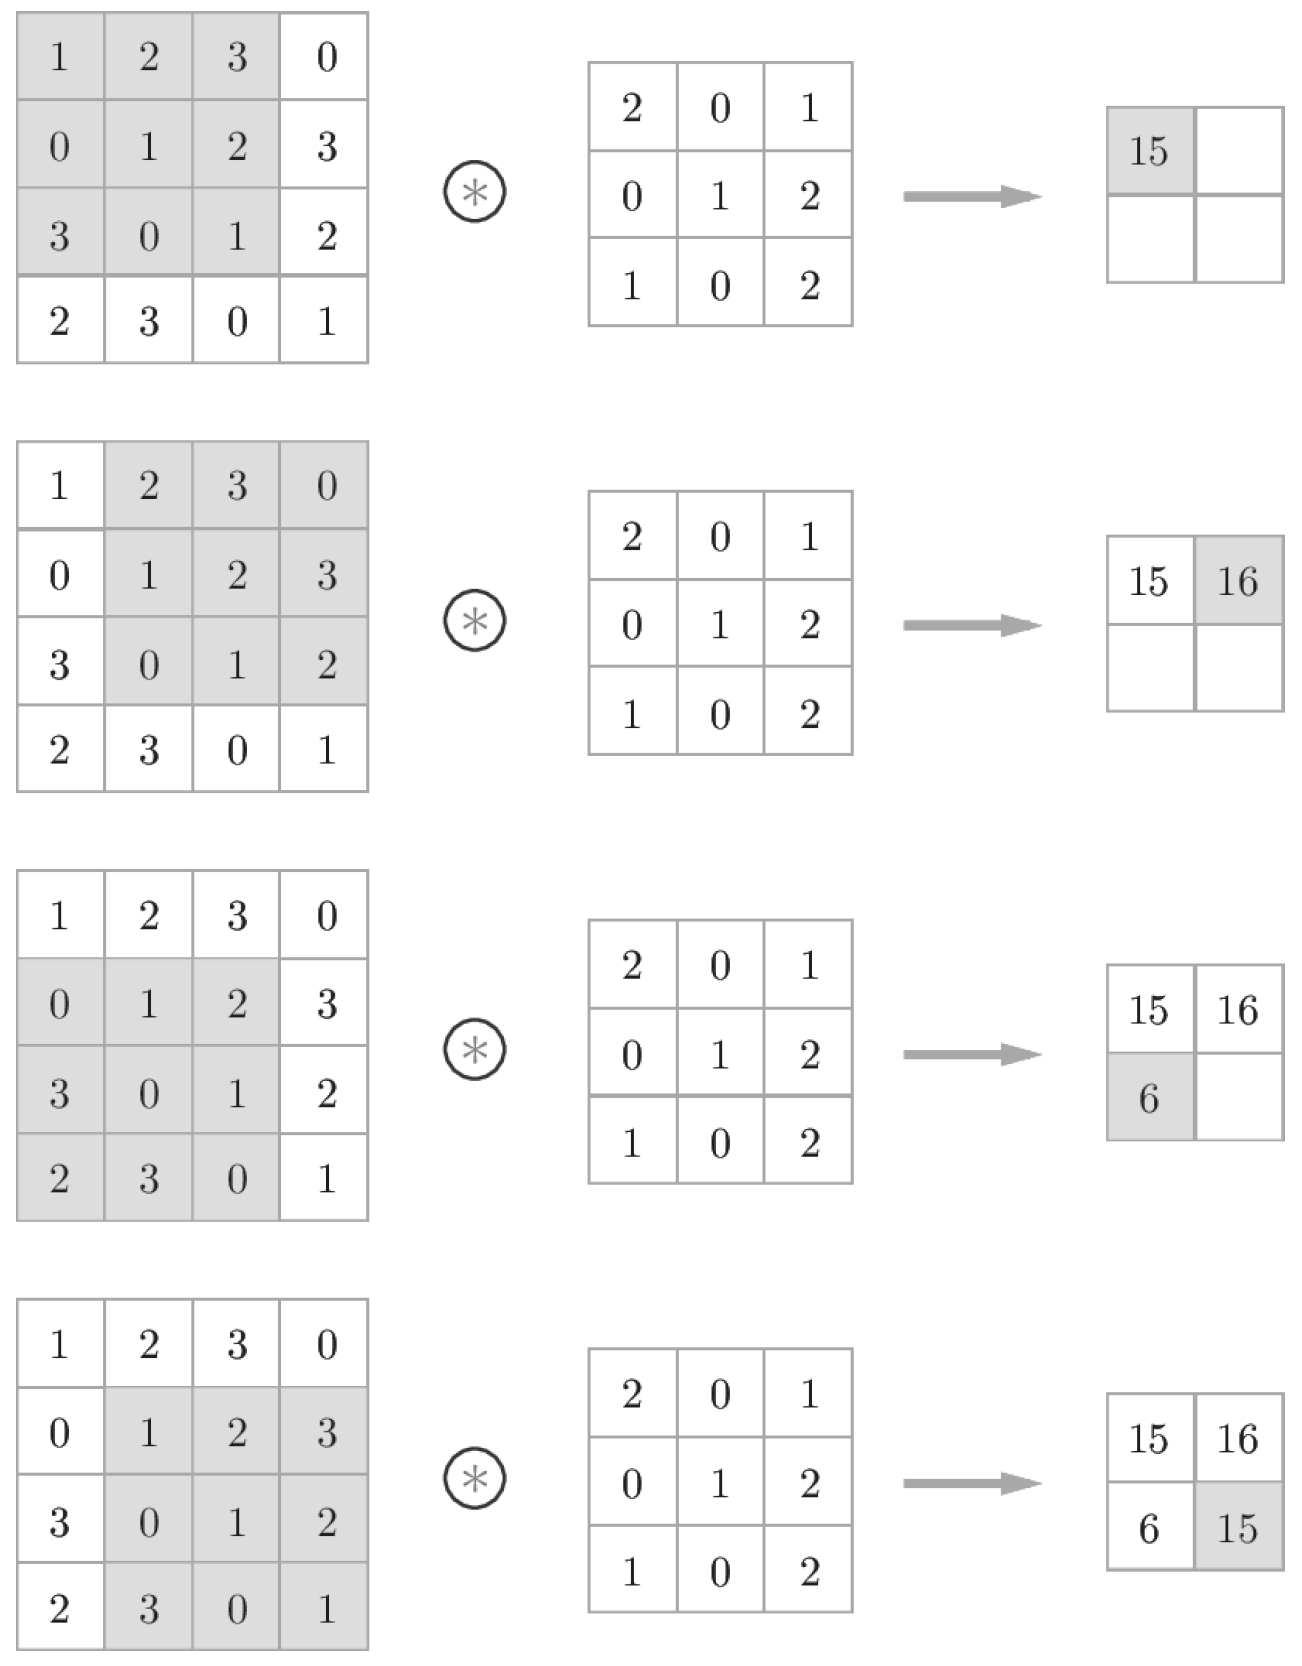 <br>



7.2.3 패딩 <br>
= 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(주로 0)으로 채운다. <br>

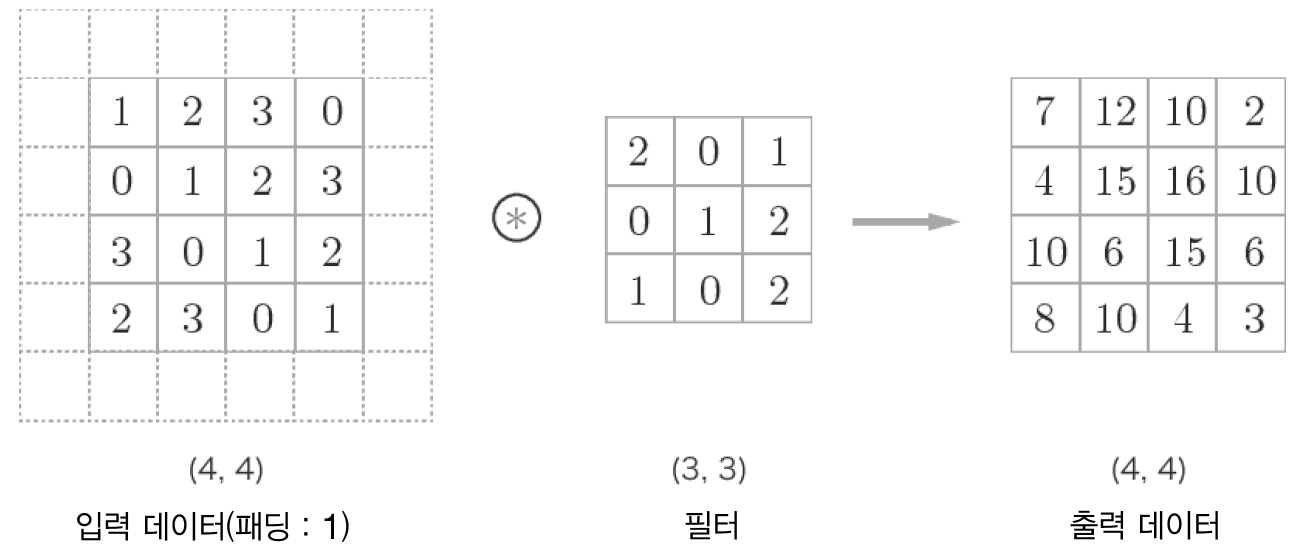<br>

note : 패딩은 주로 출력 크기를 조정할 목적으로 사용된다. <br>
위에 예시처럼 (4,4) 입력데이터의 (3,3) 필터를 연산하면 출력은 (2,2)가 되어 합성곱 연산을 거칠 때마다 크기가 작이지면서 어느 시점에서는 출력 크기가 1이 되어버린다. <br>
하지만 패딩으로 인하여 출력을 입력데이터와 같게 하여 이러한 사태를 막을 수 있다. <br>
- 즉, 입력데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있다

7.2.4 스트라이드 <br>
= 필터를 적용하는 위치의 간격 <br>
(밑 그림처럼 2로 하면 윈도우가 2칸씩 이동한다)

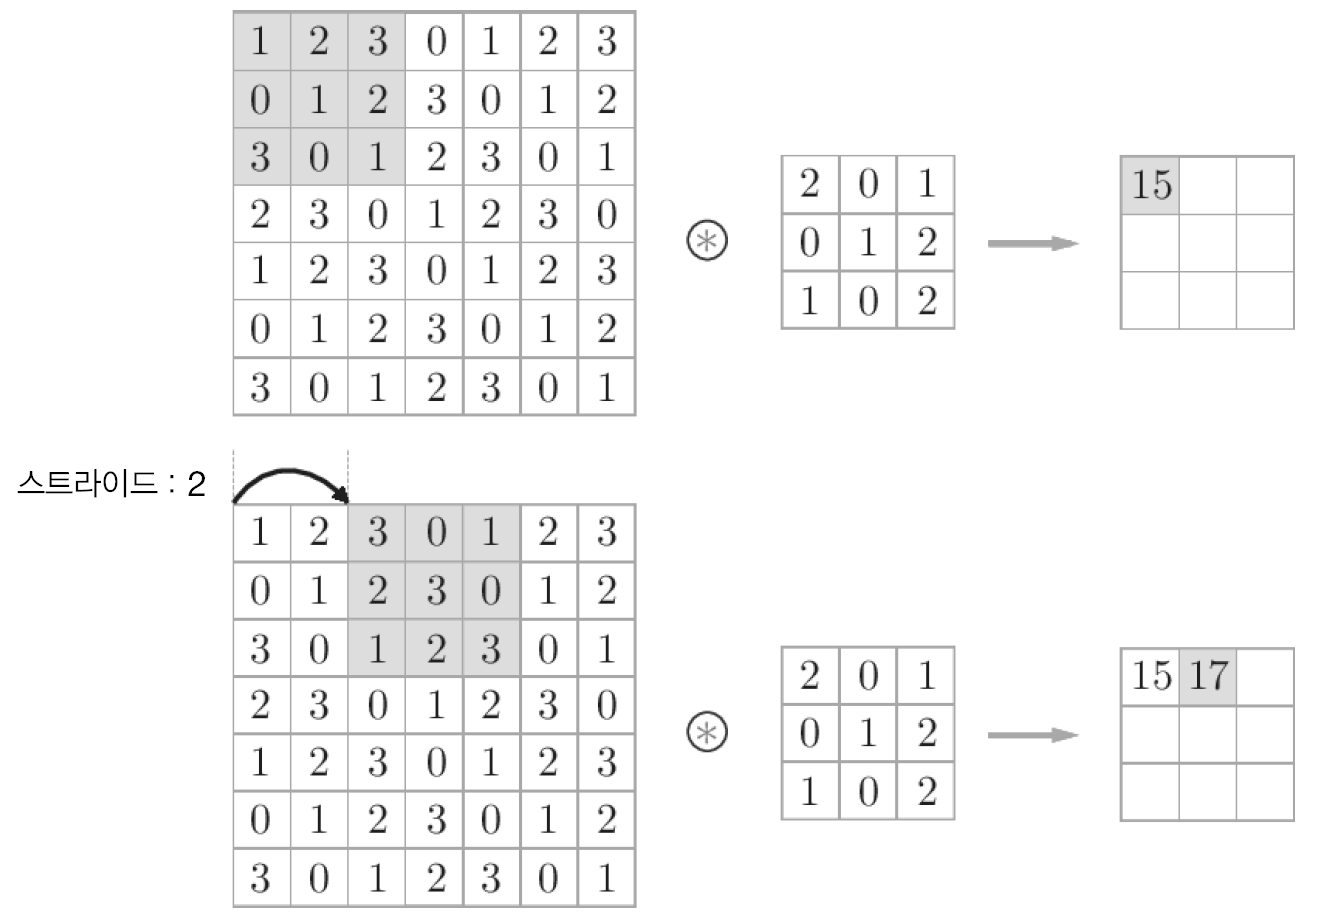 <br>

스트라이드를 키우면 출력 크기는 작아지고, 패딩을 크게하면 출력 크기를 커진다. <br>

이를 수식화하면 이렇다. <br>
입력 크기 (H,W) / 필터 크기 (FH,FW) / 출력 크기 (OH,OW) / 패딩 P / 스트라이드 S <br>
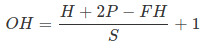 <BR>
    
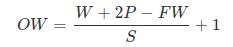 

7.2.5 3차원 데이터의 합성곱 연산 <br>
- 채널까지 고려한 3차원 데이터를 다루는 합성곱 연산 <br>

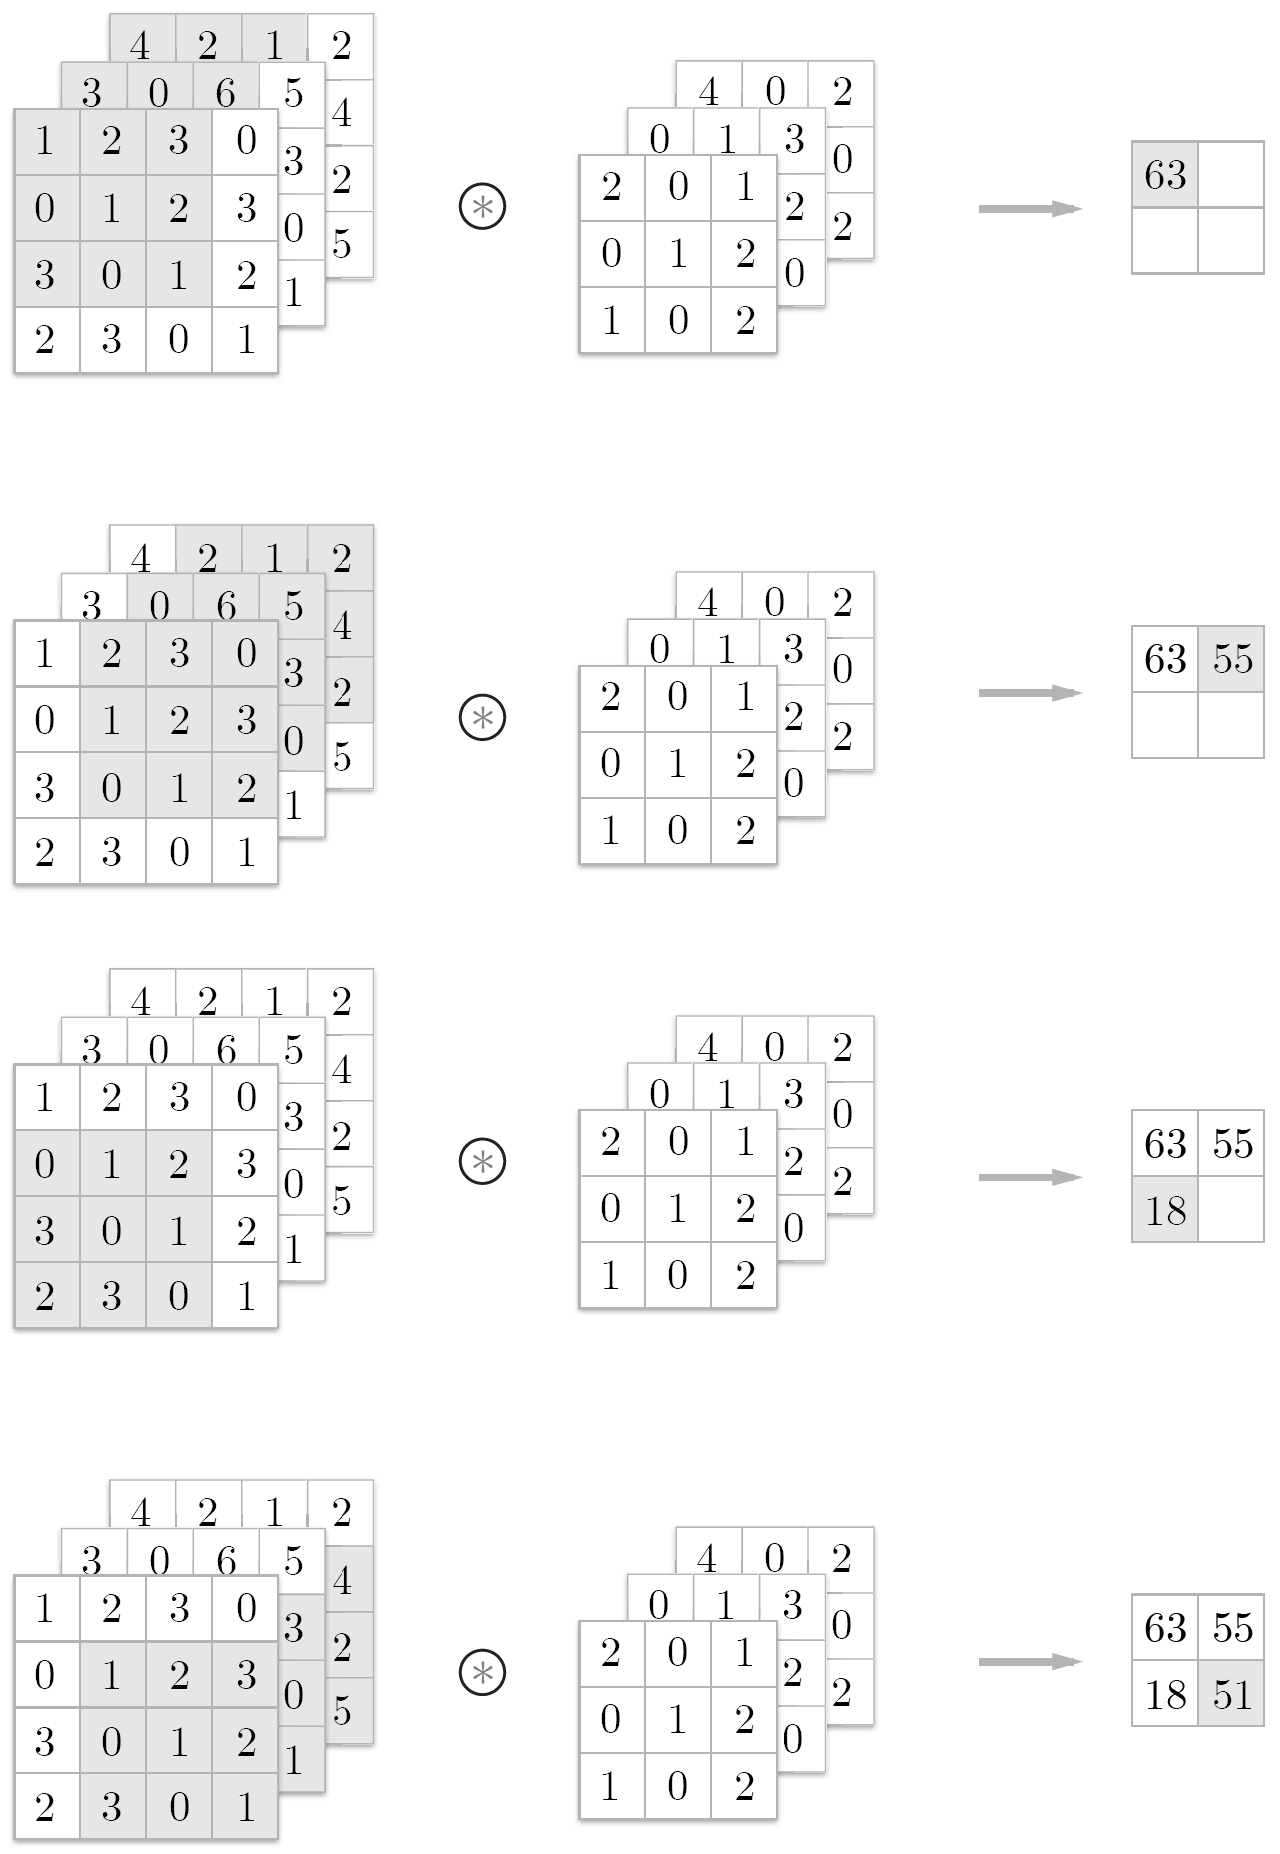<br>

- 길이방향(채널 방향)으로 특징 맵이 늘어난 것을 확인할 수있다.<br>
- 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻는다. <br>
<br>
주의할점 <br>
- 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다. <br>
- 필터 자체의 크기는 원하는 값으로 설정할 수 있다. 

7.2.6 블록으로 생각하기 <br>
합성곱 연산의 출력으로 다수의 채널을 내보낼려면 필터(가중치)를 다수 사용하는 것이다. <br>

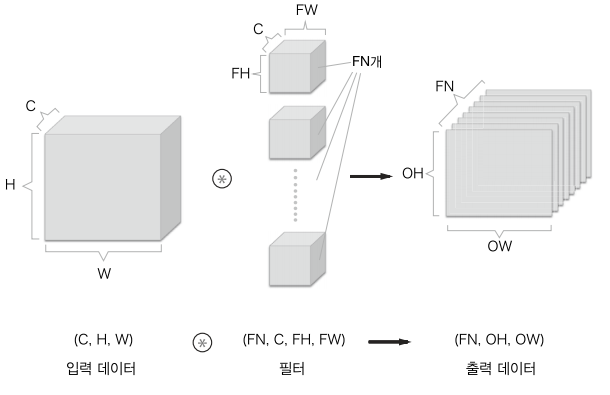 <br>

필터를 FN개 적용하면 출력 맵도 FN개가 생성된다. <br>
그래서 필터의 가중치 데이터는 4차원 데이터로 (출력 채널 수, 입력 채널 수, 높이, 너비)순이다. <br>
<br>
편향도 FN개로 편향의 형상은 (FN,1,1)이다. <BR>

7.2.7 배치 처리 <br>
걱 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장한다 


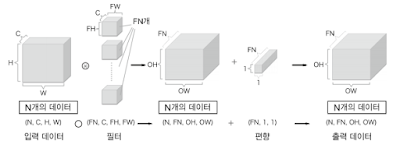<br>

신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄진다. <br>
즉 N회 분의 처리를 한 번에 수행 

<h3> 7.3 풀링 계층 </h3>
풀링 = 세로, 가로 방향의 공간을 줄이는 연산 <br>

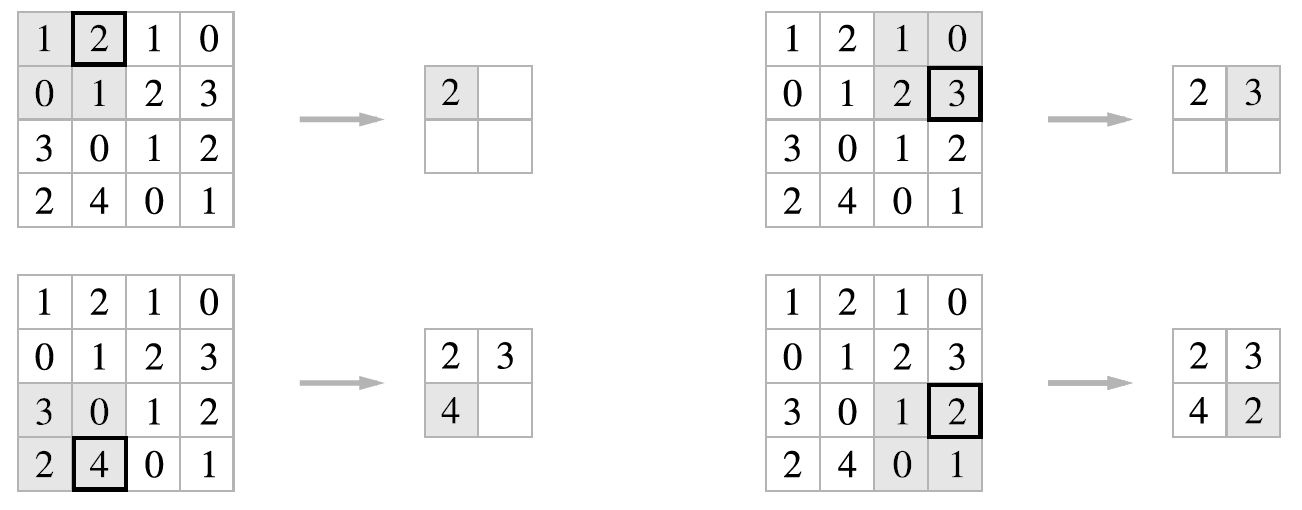 <br>

최대 풀링(max pooling)은 최댓값을 구하는 연산으로 윈도우에서 가장 큰 원소 하나르 꺼낸다. <br>
(보통 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정)<br>

<br>
note: 최대풀링 외에도 평균 풀링 등이 있다. <br>
평균 풀링은 대상 영역의 평균을 계산한다. <br>
(이미지 인식 분야에서는 주로 최대 풀링을 사용)

7.3.1 풀링 계층의 특징 <br>

1. 학습해야 할 매개변수가 없다. <br>
- 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리라서 특별히 학습할 것이 없다. <br>

2. 채널 수가 변하지 않는다.<br>
- 입력 데이터의 채널 수 그대로 출력 데이터로 내보낸다. <br>

3. 입력의 변화에 영향을 적게 받는다. <br>


7.4 합성곱/풀링 계층 구현하기 <br>

7.4.1 4차원 배열 <br>

In [1]:
import numpy as np
x = np.random.rand(10,1,28,28) #무작위로 데이터 생성
x.shape

(10, 1, 28, 28)

In [3]:
# 첫번째 데이터
x[0].shape

(1, 28, 28)

7.4.2 im2col로 데이터 전개하기 <br>
합성곱 연산을 그대로 구현을 할려면 for문을 겹겹이 써야한다. 이는 성능이 떨어진다는 단점이 있다.<br>
그래서 for문 대신 im2col이라는 편의 함수를 사용해 구현한다. <br><br>

im2col은 입력 데이터를 필터링하기 좋게 전개하는 함수이다. <br>
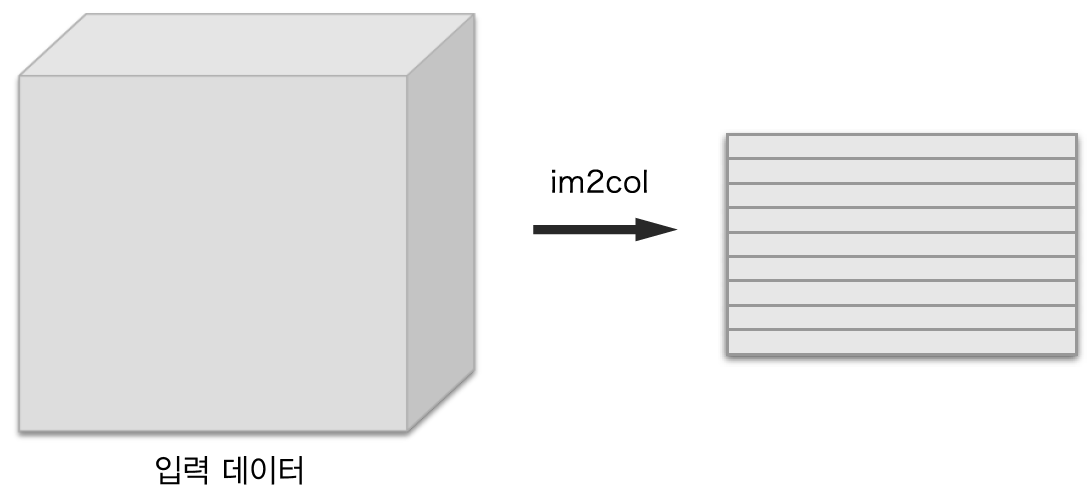<br>

im2col을 사용해 구현하면 메모리를 더 많이 소비하는 단점이 있다. <br>
하지만 컴퓨터는 큰 행렬을 묶어서 계산하는데 탁월하다. <br>
<br>
note : im2col = image to column으로 이미지에서 행렬로 라는 뜻이다. <br>
caffe나 chainer 등의 딥러닝 프레임워크는 im2col이라는 이름의 함수를 만들어 합성공 계층의 구현할 때 이용하고 있다. <br>
<br>
필터는 세로로 1열로 전개하여 행렬곱을 계산한다. <br>
CNN은 데이터를 4차원 배열로 저장하므로 2차원 출력 데이터를 4차원으로 reshape 해준다.  

7.4.3 합성곱 계층 구현하기 <br>

In [5]:
import sys,os
sys.path.append(os.pardir)
from scratch.common.util import im2col

x1 = np.random.rand(1,3,7,7) # 데이터 수 ,채널 수 , 높이 너비
col1 = im2col(x1,5,5,stride=1,pad=0) # 입력데이터, 필터의 높이, 필터의 너비, 스트라이드, 패딩
print(col1.shape)

(9, 75)


In [6]:
x2 = np.random.rand(10,3,7,7) # 데이터 10개
col2 = im2col(x2,5,5,stride=1,pad=0)
print(col2.shape)

(90, 75)


결과의 크기가 입력데이터의 크기가 10배라서 똑같이 10배가 차이난다. 

In [9]:
from scratch.common.util import col2im
class convolution:
    def __init__(self,w,b,stride=1,pad=0): # 필터, 편향, 스트라이드, 패딩을 인수로 받아 초기화
        self.w = w
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self,x):
        fn , c , fh, fw = self.w.shape
        n,c,h,w = x.shape
        out_h = int(1+(h+ 2*self.pad - fh) / self.stride)
        out_w = int(1+(w+ 2*self.pad - fw) / self.stride)
        
        col = im2col(x,fh,fw,self.stride,self.pad)
        col_w = self.w.reshape(fn,-1).T # 2차원으로 변경 (-1로 하여 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어준다.)
        out = np.dot(col,col_w)+self.b
        
        out = out.reshape(n, out_h, out_w, -1).transpose(0,3,1,2)
        # transpose 함수= 다차원 배열의 축 순서를 바꿔주는 함수 
        
        return out
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

역전파는 Affine 계층의 구현과 공통점이 많다. <br>
im2col을 역으로 처리해야하는데 col2im 함수를 사용하다 

7.4.4 풀링 계층 구현하기 <br>
채널 쪽이 독립적이라는 점이 합성곱 계층 때와 다르다.
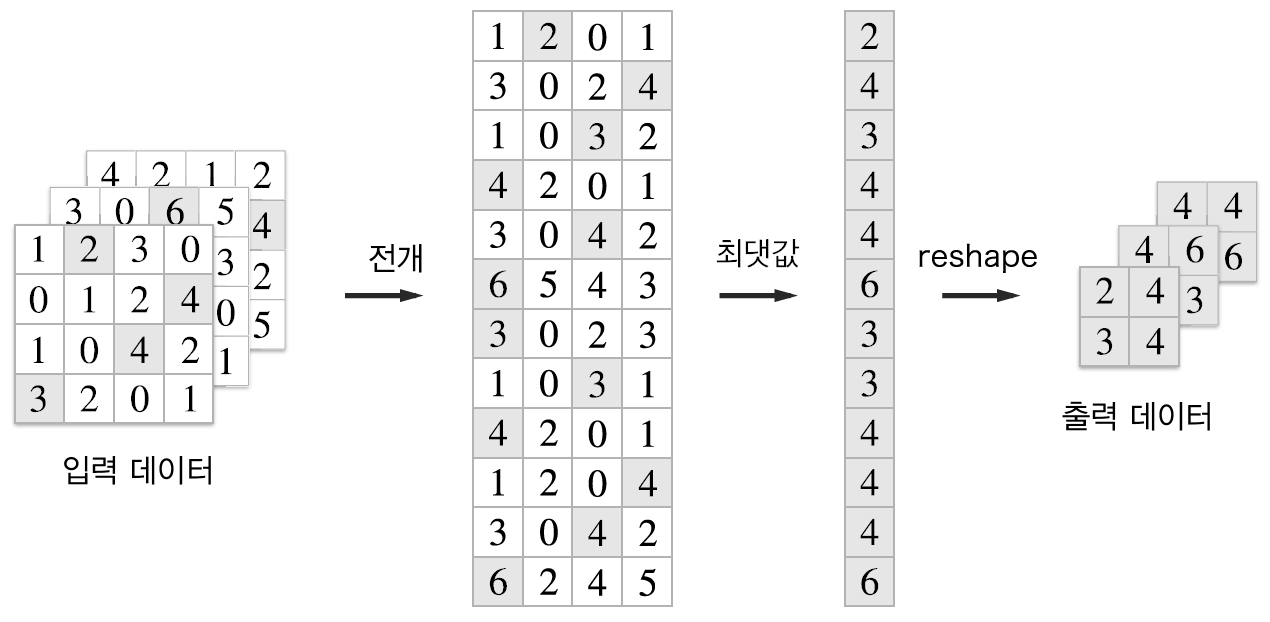

In [10]:
class pooling:
    def __init__(self,pool_h,pool_w,stride=1,pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self,x):
        n,c,h,w = x.shape
        out_h = int(1+(h-self.pool_h) / self.stride)
        out_w = int(1+(w-self.pool_w) / self.stride)
        
        # 전개 1 (입력데이터를 전개한다.)
        col = im2.col(x,self.pool_h,self.pool_w,self.stride,self.pad)
        col = col.reshape(-1,self.pool_h*self.pool_w)
        
        # 전개 2 (행별 최댓값을 구한다.)
        out = np.max(col,axis =1) # axis =1 로 행 방향의 최닷값을 구한다. 
        
        # 전개 3 (적절한 모양으로 성형한다.)
        out = out.reshape(n,out_h,out_w,c).transpose(0,3,1,2)
        
        return out
    

<h3> 7.5 CNN 구현하기 </h3>

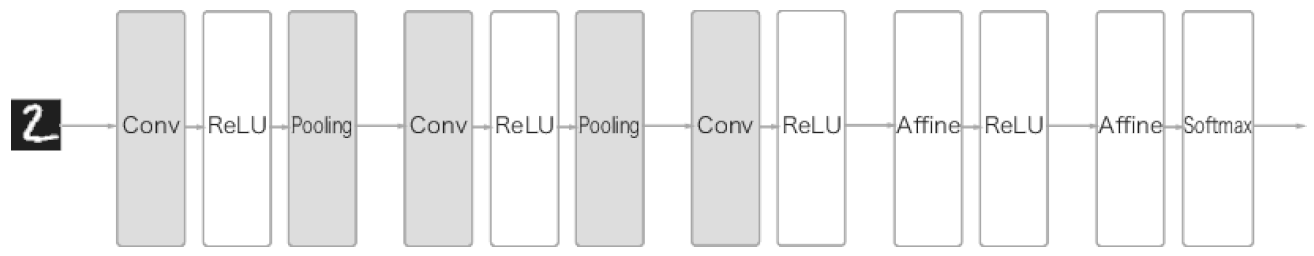

In [36]:
class simpleconvnet:
    def __init__(self,input_dim = (1,28,28),conv_param={'filter_num':30,'filter_size':5,'pad':0,'stride':1}, hidden_size =100, output_size=10,weight_init_std = 0.01):
        # 딕셔너리에서 꺼낸다.
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        # 합성곱 계층의 출력 크기를 계산
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride +1
        pool_output_size = int(filter_num * (conv_output_size/2)* (conv_output_size/2))
        
        # 가중치 매개변수를 초기화하여 params라는 딕셔너리에 저장
        self.params = {}
        self.params['w1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['w2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['w3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        # CNN을 구성하는 계층들을 생성 
        self.layers = OrderedDict()
        self.layers['conv1'] = convolution(self.params['w1'],
                                          self.params['b1'],
                                          conv_param['stride'],
                                          conv_param['pad'])
        self.layers['relu1'] = Relu()
        self.layers['pool1'] = pooling(pool_h=2 ,pool_w = 2, stride =2)
        self.layers['affine1'] = Affine(self.params['w2'], self.params['b2'])
        self.layers['relu2'] = Relu()
        self.layers['affine2'] = Affine(self.params['w3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()
        
        
    # 추론을 수행하는 predict 메서드와 손실 함수의 값을 구하는 loss 메서드를 다음과 같이 구현
    # x = 입력 데이터 t = 정답레이블
    def predict(self,x):
        for layer in self.layers.values():
            x = layer.forward(x) #결과를 다음 게층으로 넘김
        return x
    
    def loss(self,x,t):
        y = self.predict(x)
        return self.last_layer.forward(y,t)
    
    # 오차역전파법으로 기울기를 구하는 구현
    def gradinent(self,x,t):
        # 순전파
        self.loss(x,t)
        
        # 역전파
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers,values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        # 결과 저장
        grads = {}
        grads['w1'] = self.layers['conv1'].dw
        grads['b1'] = self.layers['conv1'].db
        
        grads['w2'] = self.layers['affine1'].dw
        grads['b2'] = self.layers['affine1'].db
        
        grads['w3'] = self.layers['affine2'].dw
        grads['b3'] = self.layers['affine2'].db
        
        return grads
    

In [37]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from scratch.dataset.mnist import load_mnist
from scratch.common.trainer import Trainer
from collections import OrderedDict
from scratch.common.gradient import numerical_gradient
from scratch.common.layers import *

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = simpleconvnet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


AttributeError: 'simpleconvnet' object has no attribute 'gradient'

<h3> 7.6 CNN 시각화하기 </h3>
7.6.1 1번째 층의 가중치 시각화하기 <br>

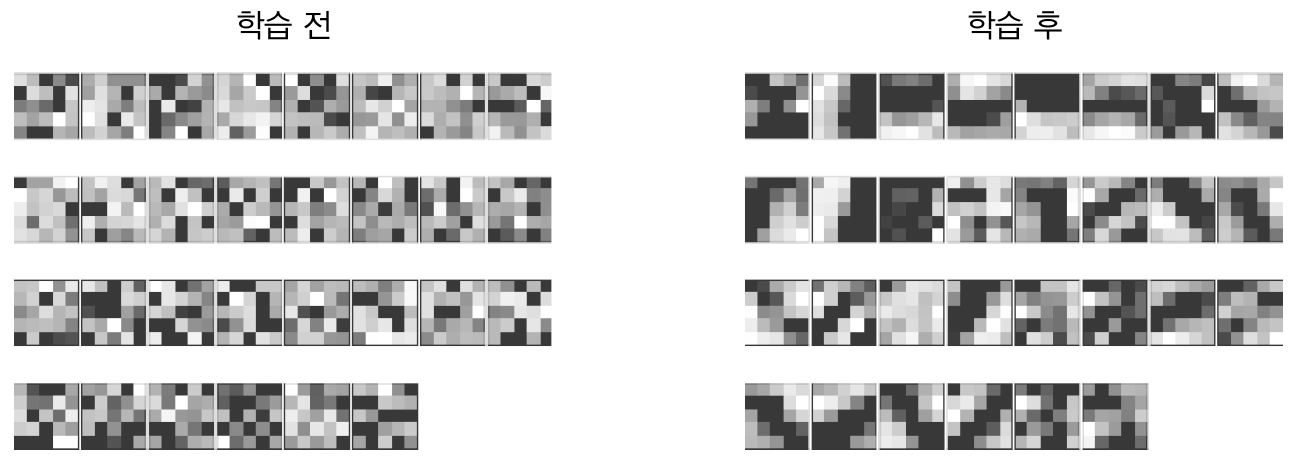
<br>
- 학습 전 필터는 무작위로 초기화되고 있어 규칙성이 없다. <br>
- 하지만 학습을 마친 필터는 규칙성 있는 이미지가 되었다. <br>

> 합성곱 계층의 필터는 에지나 블롭 등의 원시적인 정보를 추출할 수 있다. <br>

7.6.2 층 깊이에 따른 추출 정보 변화 <br>

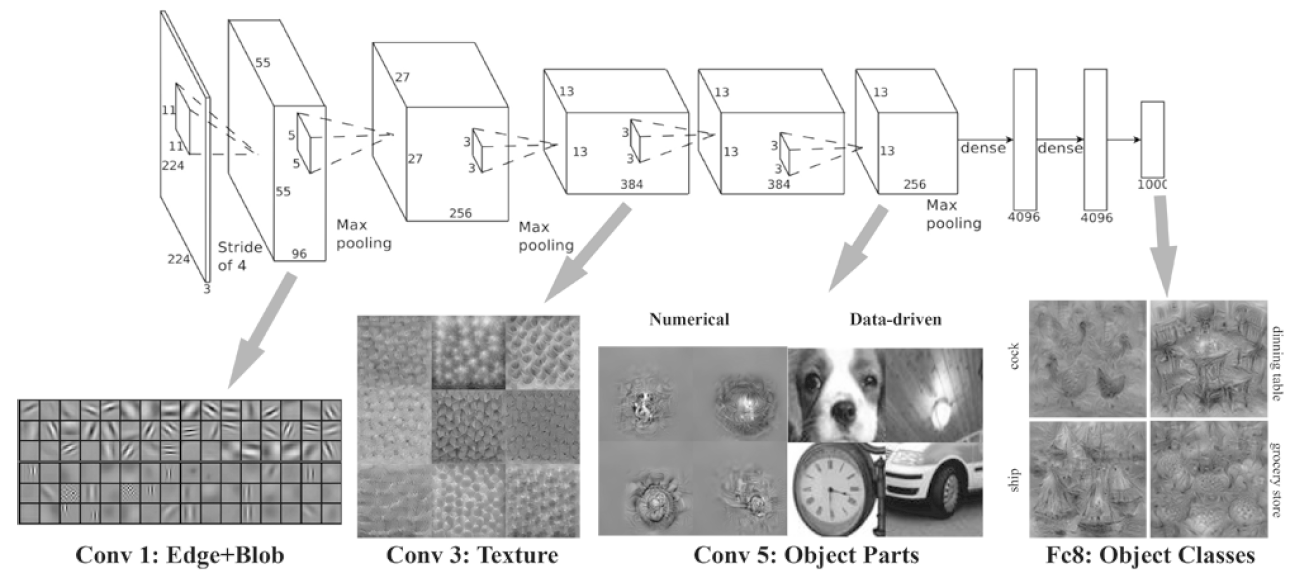 <br>

합성곱 계층을 여러 겹 쌓으면, 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출된다. <br>
처음 층은 단순한 에지에 반응하고, 이어서 텍스처에 반응학, 더 복잡한 사물에 반응한다. <br>
> 층이 깊어지면서 고급 정보로 변화해간다. (사물의 의미를 이해하도록 변화)

<h3> 7.7 대표적인 CNN </h3>
7.7.1 LeNet <br>
- 손글씨 숫자를 인식하는 네트워크로, 1998년에 제안되었다. <br>
- 합성곱 계층과 풀링 계층을 반복하고, 마지막에 완전연결 계층을 거치면서 결과를 출력 <br>

[현재의 CNN과 차이점]<br>
1. 활성화함수차이 <br>
- 저때는 sigmoid를 썻고, 지금은 Relu를 쓴다. <br>
2. 서브샘플링으로 중간 데이터의 크기를 줄인다. <br>
- 현재는 최대 풀링이 주류이다. 

7.7.2 AlexNet <br>
2012년에 발표된 AlexNet은 딥러닝 열풍을 일으키는데 큰 역할을 했다. <br>
- 합성곱 계층과 풀링 계층을 거듭하여 마지막으로 완전연결계층을 거쳐 결과를 추출한다. <br>
Alex와 Le의 차이점은 <br>
1. 활성화 함수로 Relu 사용 <br>
2. LRN이라는 국소적 정규화를 실시하는 계층을 이용 <br>
3. 드롭아웃을 사용 <br>
<BR>
LeNet과 AlexNet은 큰 차이는 없다 .<br>
   이를 둘러싼 환경과 컴퓨터 기술이 큰 진보를 이루었다. <br>
    <br>
note : 딥러닝에는 대부분 수많은 매개변수가 쓰인다. 그래서 학습할려면 엄청난 양의 계산이 필요하다. <br>
    그 매개변수를 '피팅'시키는 데이터도 대량으로 필요하다. <br>
    GPU와 빅데이터는 이런 문제를 해결했다.

<h3> 7.8 정리 </h3>
1. CNN은 지금까지 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.<br>
2. 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다. <br>
3. CNN을 시각화해보면 계층이 깊어질수록 고급정보가 추출되는 모습을 볼 수 있다. <br>
4. 대표적인 CNN은 AlexNet과 LeNet이 있다. <br>
5. 딥러닝의 발전에는 빅데이터와 GPU가 크게 기여했다. 